### LAB<sup>9-1</sup> 합성곱을 만들어 보자 (p.328)

**실습 목표**

필터를 다양하게 생성해서 이미지와 합성곱을 구현해보자. 싨ㅂ을 통해 합성곱 연삽의 원리에 대해 깊이 이해해 보자.

#### 1. 맷플롭립의 pyplot과 함께 이미지를 처리하는 image 서브 모듈을 임포트한다. 넘파이도 함께 임포트해 두자.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#### 2. 아래 코드에 나타난 주소에 PNG 이미지를 준비해 두었다. 맷플롭립 패키지를 이용하여 간단히 읽고, 화면에 그려보는 코드는 다음과 같다.

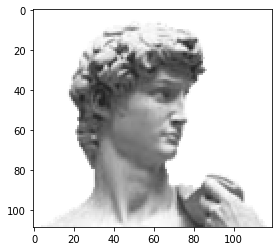

In [2]:
url = 'https://github.com/dknife/ML/raw/main/data/image/david.png'
img = mpimg.imread(url)

plt.imshow(img)

#### 3. 맷플롭립을 이용하여 이미지를 읽으면 넘파이 배열로 저장된다고 했다. 어떤 크기를 가지고 있는지 확인해 보자.

 이 이미지는 109행 120열의 배열로 저장되어 있다. 그리고 마지막에 나타나 있는 4는 채널의 수이다. 즉 4개의 채널이 있는 것이다. 이것은 각각 빨간색, 녹색, 파란색의 강도 3개 채널과 픽셀의 불투명도를 의미하는 알파 채널이다.

In [3]:
img.shape

(109, 120, 4)

#### 4. 패딩을 구현해 보자. 

넘파이는 배열에 값을 덧대는 패딩을 지원하는 함수 pad()를 가지고 있다. 여기에 패딩 대상이 되는 배열을 지정하고, 각 축별로 앞과 뒤에 얼마나 덧댈 것인지를 pad_width로 지정할 수 있다. 우리는 행과 열은 늘리되 채널을 늘리지는 않으므로 p_size만큼 행과 열의 앞과 뒤에 데이터가 늘도록 하였다. 여기서는 상수값을 덧대게 했으며, 상수는 0으로 설정하였다.

In [4]:
def padding(image, p_size):    # 넘파이의 pad 함수를 이용한 패딩 구현
    padded_img = np.pad(
        array = image,
        pad_width = ((p_size,p_size), (p_size,p_size), (0,0)),
        mode = 'constant', constant_values = 0)
    return padded_img

#### 5. 패딩을 적용해 보자. 

이미지의 테두리에 0의 값으로 패딩이 이루어졌다. 0이지만 흰색으로 보이는 것은 알파 채널도 0으로 패딩되어 불투명도가 0, 즉 투명한 색으로 패딩이 되었기 때문이다. 알파 채널이 없는 book.png는 검정 테두리가 생긴 걸 확인할 수 있다.

(113, 124, 4)

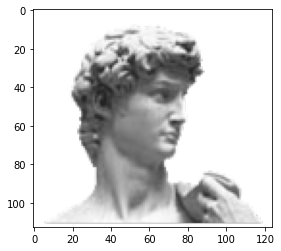

In [5]:
padded = padding(img, 2)
plt.imshow(padded)
padded.shape

#### 6. 이제 필터를 만들어 보자. 우선 앞에서 살펴본 상자 필터를 만들어 보자.

In [6]:
box_filter = np.array(
    [[1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9],
     [1/9, 1/9, 1/9]])

#### 7. 이미지에 합성곱 연산을 적용한다는 것은 특정 필터를 이미지의 조그마한 영역에 요소별로 곱한 다음 그 결과를 모두 합하는 것이다. 다음과 같이 특정 영역에 필터를 적용하는 연산을 구현할 수 있다.

In [7]:
def apply_filter(small_region, filter):
    conv = np.multiply(small_region, filter)
    return np.sum(conv)

#### 8. 이렇게 특정 영역에 필터를 적용하는 일을 이미지 전체에 각 픽셀마다 적용하면 합성곱 연산이 된다.

In [8]:
def convolution(img, filter):
    r, c, channels = img.shape
    rp, cp = filter.shape
    th_r, th_c = (rp-1)//2, (cp-1)//2

    start = np.array([th_r, th_c])
    end   = np.array([r, c]) - start
    # print(start, end, rp, cp) # 확인을 위한 목적으로 사용
    conv_img = np.zeros((r - th_r*2, c - th_c*2, channels))

    for channel in range(channels):
        for i in range(start[0], end[0]):
            for j in range(start[1], end[1]):
                conv_img[i-th_r, j-th_c, channel] = apply_filter(
                    img[i-th_r:i+th_r+1, j-th_c:j+th_c+1, channel],
                    filter)
    return conv_img

#### 9. 다음과 같이 상자 필터를 적용해 보자. 원본보다 흐려진 이미지를 얻을 것이다.

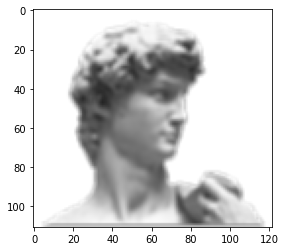

In [9]:
conv_img = convolution(padded, box_filter)
plt.imshow(conv_img)

#### 10. 라플라시안 필터도 만들어 보자. 외곽선을 추출할 수 있을 것이다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


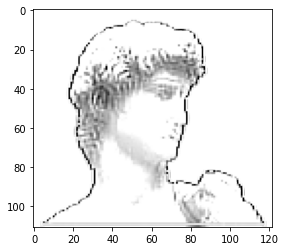

In [10]:
laplacian = np.array(
    [[1, 0, 1],
     [1,-4, 1],
     [1, 0, 1]])
conv_img = convolution(padded, laplacian)
plt.imshow(conv_img)

#### 11. 난수를 발생시켜 필터를 만들면 어떻게 될까?

합성곱 신경망은 이러한 난수 필터를 발생시켜 좋은 특징을 찾을 수 있도록 학습하는 것이다. 난수의 특징 때문에 실행할 때마다결과가 다를 것이다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


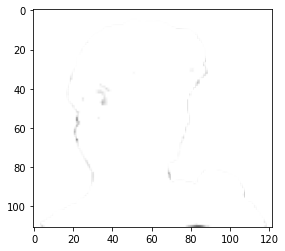

In [11]:
unknown = np.random.rand(3, 3) # 필터 값에 따라 매번 합성곱결과가 다름

conv_img = convolution(padded, unknown)
np.clip(conv_img, 0, 255)
plt.imshow(conv_img)